<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem1/blob/main/Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of Naive Bayes 




In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import train_test_split
from math import sqrt
from math import pi
from math import exp
from sklearn import preprocessing 
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from itertools import cycle
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = datasets.load_iris()

## Split the data by Class

In [ ]:
def split_by_class(data):
  splitted_data = dict()
  for i in range(len(data)):
    for j in range(data.shape[1]-1):
      feature = data.iloc[i][j]
      class_name = data.iloc[i][data.shape[1]-1]
      if class_name not in splitted_data:
        splitted_data[class_name] = list()
      splitted_data[class_name].append(feature)

  return splitted_data


## Calculate data set statistics

In [ ]:
def data_stats(data):
  for i in range(len(data)):
    mean = data.mean(axis = 0)
    variance = data.var(axis = 0)
    sd = variance**0.5
    length = len(data)

    return mean, sd, length

##Calculate statistics for each class

In [ ]:
def stats_by_class(data):
  splitted = split_by_class(data)
  splitted_stats = dict()
  listt = []
  x = data.shape[1] - 1
  for key, value in splitted.items():
    for i in range(len(splitted[0])):
      if key in data['target'].unique():
        mean = [np.mean(splitted[key][i : : x]) for i in range(len(splitted[key])//(len(splitted[key])//x))]
        variance = [np.var(splitted[key][i : : x]) for i in range(len(splitted[key])//(len(splitted[key])//x))]
        length = [len(splitted[key][i : : x]) for i in range(len(splitted[key])//(len(splitted[key])//x))]
    splitted_stats[key] = mean, variance, length[0]
  return splitted_stats


##Calculate Gaussian PDF

In [ ]:
def gaussian_pdf(x, mean, sd):
    exponent = exp(-((x-mean)**2 / (2 * sd**2 )))
    pdf = (1 / (sqrt(2 * pi) * sd)) * exponent
    print(pdf)
    return pdf

##Calculate class probability

In [ ]:
def calc_class_prob(data, listt):
  stats = stats_by_class(data)
  total_rows = sum([stats[x][2] for x in stats])
  prob = dict()
  for key, value in stats.items():
    prob[key] = stats[key][2]/float(total_rows)
    for i in range(len(value)):
      print(listt)
      mean, sd, _ = value[0][i], value[1][i], value[2]
      prob[key] *= gaussian_pdf(listt[i], mean, sd)

  return prob

In [ ]:
def predict_nb(data, listt):
  pred_list =[]
  prob = calc_class_prob(data, listt)
  max_value = max(prob.values())
  label = [k for k, v in prob.items() if v == max_value]

  return label, max_value


##Testing with data downloaded from Kaggle

In [ ]:
data = pd.DataFrame(data= np.c_[iris.data, iris.target],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
def predict(data):
  predicted_list = []
  prob_list = []
  for i in range(len(data)):
    label, pred_prob = predict_nb(data, data.iloc[i, :].tolist())
    predicted_list.append(label)
    prob_list.append(pred_prob)

  return predicted_list, prob_list


In [ ]:
predicted_list, prob_list = predict(data)

[5.1, 3.5, 1.4, 0.2, 0.0]
2.432091200346839
[5.1, 3.5, 1.4, 0.2, 0.0]
2.4859279189355568
[5.1, 3.5, 1.4, 0.2, 0.0]
1.4953053700906096
[5.1, 3.5, 1.4, 0.2, 0.0]
0.009078652581413736
[5.1, 3.5, 1.4, 0.2, 0.0]
1.5487469525610597e-12
[5.1, 3.5, 1.4, 0.2, 0.0]
2.1707569787239924e-38
[5.1, 3.5, 1.4, 0.2, 0.0]
0.0008727925366410642
[5.1, 3.5, 1.4, 0.2, 0.0]
6.447203343179364e-06
[5.1, 3.5, 1.4, 0.2, 0.0]
1.2947042397163046e-42
[4.9, 3.0, 1.4, 0.2, 0.0]
2.2430020005196507
[4.9, 3.0, 1.4, 0.2, 0.0]
0.027939981179864518
[4.9, 3.0, 1.4, 0.2, 0.0]
1.4953053700906096
[4.9, 3.0, 1.4, 0.2, 0.0]
0.0005827851038238713
[4.9, 3.0, 1.4, 0.2, 0.0]
0.2414552870534423
[4.9, 3.0, 1.4, 0.2, 0.0]
2.1707569787239924e-38
[4.9, 3.0, 1.4, 0.2, 0.0]
0.00011546995661198757
[4.9, 3.0, 1.4, 0.2, 0.0]
3.7888151183581034
[4.9, 3.0, 1.4, 0.2, 0.0]
1.2947042397163046e-42
[4.7, 3.2, 1.3, 0.2, 0.0]
0.1393176958197273
[4.7, 3.2, 1.3, 0.2, 0.0]
0.7638108573887934
[4.7, 3.2, 1.3, 0.2, 0.0]
4.041836237973755e-06
[4.7, 3.2, 1.3, 

In [ ]:
print(predicted_list)

[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [2.0], [2.0], [2.0], [1.0], [1.0], [1.0], [2.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [2.0], [1.0], [1.0], [1.0], [1.0], [2.0], [1.0], [1.0], [1.0], [1.0], [1.0], [2.0], [2.0], [1.0], [1.0], [1.0], [1.0], [1.0], [2.0], [1.0], [2.0], [2.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [1.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [1.0], [2.0], [2.0], [2.0], [2.0], [2.0], [1.0], [2.0], [1.0], [2.0], [1.0], [2.0], [2.0], [1.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0]

In [ ]:
len(predicted_list)

150

In [ ]:
print(prob_list)

[3.01354045867964, 0.031236646907871087, 1.4336712265133338e-07, 0.004672276205791181, 2.191587485868841, 6.715351735513235e-18, 0.017478265645568987, 17.89504183083497, 1.7132135986680458e-08, 0.8301202703093532, 0.015068844455692452, 0.00018062173279314938, 0.010907164604504466, 5.495795051937536e-41, 5.509556814514738e-29, 7.271077479796809e-17, 2.42016717335974e-10, 3.01354045867964, 9.351885794834528e-22, 0.41400263921882463, 1.8120548399506842e-15, 2.1001091824908023, 6.685378770248774e-55, 1.7041154976587385e-13, 2.495302283209803e-39, 7.5911985994774716e-06, 0.0007546694873659933, 4.506737960785129, 1.274848847816978, 8.835119913808862e-06, 1.2223977751934482e-05, 0.09543039996263643, 5.82606027278899e-05, 3.669093449991399e-10, 0.8301202703093532, 9.718348294793509e-17, 2.925544379164943e-09, 1.502188961625707, 5.159024223086295e-13, 13.299908950522985, 1.0959983414212046e-05, 2.590952256164001e-23, 1.4103512417413178e-11, 0.0006754182264884779, 1.939626382185243e-48, 0.010907

In [ ]:
data['predicted'] = np.array(predicted_list)
data['predicted prob'] = np.array(prob_list)
prob_list = np.array(prob_list)

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predicted,predicted prob
0,5.1,3.5,1.4,0.2,0.0,0.0,3.013540e+00
1,4.9,3.0,1.4,0.2,0.0,0.0,3.123665e-02
2,4.7,3.2,1.3,0.2,0.0,0.0,1.433671e-07
3,4.6,3.1,1.5,0.2,0.0,0.0,4.672276e-03
4,5.0,3.6,1.4,0.2,0.0,0.0,2.191587e+00


##Confusion Matrix

In [ ]:
df_confusion = confusion_matrix(data['target'], data['predicted']) 
print(df_confusion)

[[49  1  0]
 [ 0 39 11]
 [ 0  7 43]]


##Overall Accuracy

In [ ]:
print(classification_report(data['target'], data['predicted']))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.83      0.78      0.80        50
         2.0       0.80      0.86      0.83        50

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



In [ ]:
one_hot_target = pd.get_dummies(test_data['target']).squeeze()
one_hot_target = one_hot_target.to_numpy()

In [ ]:
print(one_hot_target)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

##ROC

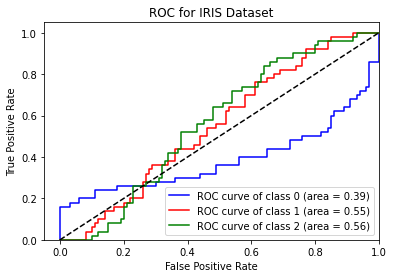

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(test_data['target'].unique())):
    fpr[i], tpr[i], _ = roc_curve(one_hot_target[:, i], prob_list)
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(len(data['target'].unique())), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for IRIS Dataset')
plt.legend(loc="lower right")
plt.show()

##Class-wise accuracy

In [ ]:
def class_accuracy(class_name, df_confusion):
  sum = 0
  for i in range(len(df_confusion)):
    sum = df_confusion[i][class_name] + sum
  
  class_acc = df_confusion[class_name][class_name]/sum
  print('class[{}], accuracy:{:.4f}' .format(class_name, class_acc))

In [ ]:
class_accuracy(0, df_confusion)

class[0], accuracy:1.0000


In [ ]:
class_accuracy(1, df_confusion)

class[1], accuracy:0.8298


In [ ]:
class_accuracy(2, df_confusion)

class[2], accuracy:0.7963
